<a href="https://colab.research.google.com/github/kusheshgangwar/stock_prediction_project/blob/main/stock_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [33]:
data = pd.read_csv('stock_data.csv')

In [34]:
# Display the first few rows
print("Dataset Overview:")
print(data.head())

Dataset Overview:
         Date        Open        High         Low       Close   Adj Close  \
0  2018-11-20   44.592499   45.367500   43.877499   44.244999   42.466824   
1  2018-11-20   71.875000   76.737503   71.000000   74.773003   74.773003   
2  2018-11-20  127.029999  134.160004  126.849998  132.429993  132.429993   
3  2018-11-20   22.783333   23.320000   22.236668   23.166000   23.166000   
4  2018-11-21   44.932499   45.067501   44.137501   44.195000   42.418831   

      Volume Company  
0  271300800    AAPL  
1  217576000    AMZN  
2   41939500    META  
3  120070500    TSLA  
4  124496800    AAPL  


In [35]:
df.describe()

,Open,High,Low,Close,Volume
count,2.000000,2.000000,2.000000,2.000000,2.000000e+00
mean,146.450000,149.250000,145.800000,148.400000,1.063750e+07
std,1.909188,1.484924,1.272792,1.979899,1.151877e+06
min,145.100000,148.200000,144.900000,147.000000,9.823000e+06
25%,145.775000,148.725000,145.350000,147.700000,1.023025e+07
50%,146.450000,149.250000,145.800000,148.400000,1.063750e+07
75%,147.125000,149.775000,146.250000,149.100000,1.104475e+07
max,147.800000,150.300000,146.700000,149.800000,1.145200e+07


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2 non-null      object 
 1   Open    2 non-null      float64
 2   High    2 non-null      float64
 3   Low     2 non-null      float64
 4   Close   2 non-null      float64
 5   Volume  2 non-null      int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 224.0+ bytes


In [38]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2023-01-01,145.1,148.2,144.9,147.0,9823000
1,2023-01-02,147.8,150.3,146.7,149.8,11452000


In [39]:
# Prepare data for training
data = data[['Close']] # Use only the 'Close' price
scaler = MinMaxScaler(feature_range=(0, 1)) # Normalize the data
scaled_data = scaler.fit_transform(data)


In [40]:
# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


In [58]:
# Create datasets for LSTM
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0]) # Indented this line
        y.append(dataset[i + time_step, 0]) # Indented this line
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [59]:
# Reshape data for LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [60]:
# Build the LSTM model
model = Sequential([
 LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
 LSTM(50, return_sequences=False),
 Dense(25),
 Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# Train the model
model.fit(X_train, y_train, batch_size=64, epochs=50, verbose=1)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - loss: 0.0566
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - loss: 0.0285
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 0.0271
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.0289
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - loss: 0.0266
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - loss: 0.0267
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - loss: 0.0261
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0240
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 0.0250
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0234
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0241
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0233
Epoch 13/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0228
Epoch 14/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - loss: 0.0228
Epoch 15/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.0226
Ep

In [62]:
# Predict and scale back to original values
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


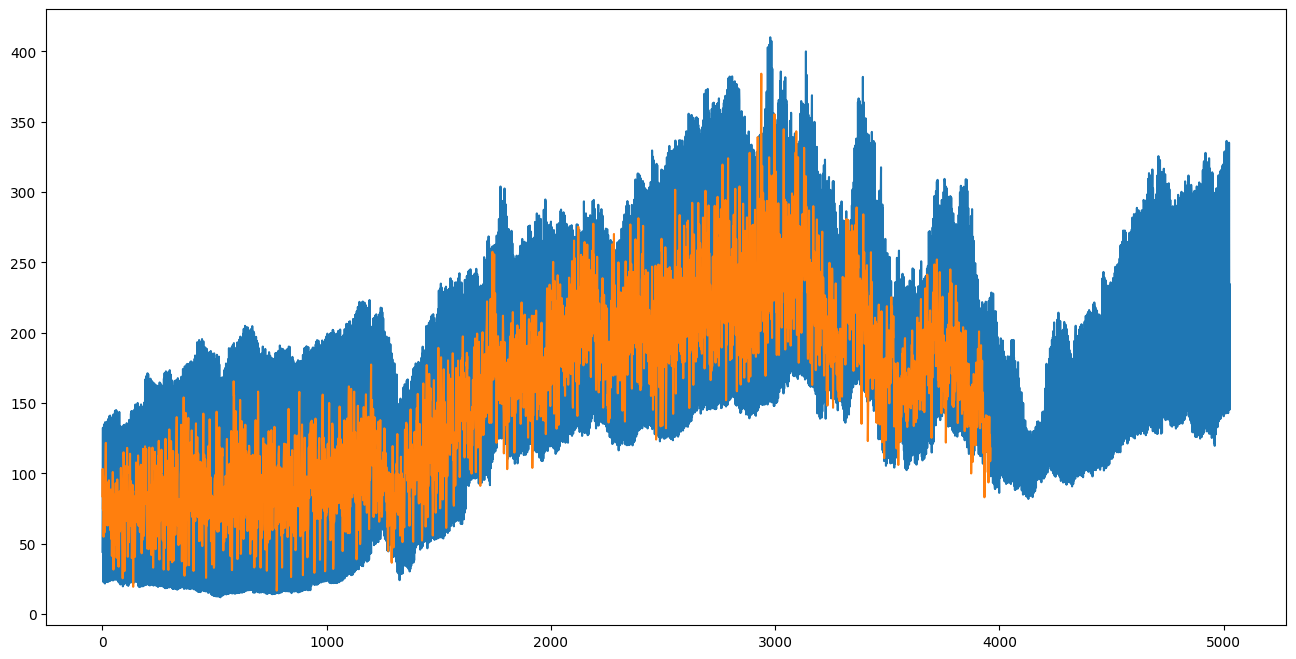

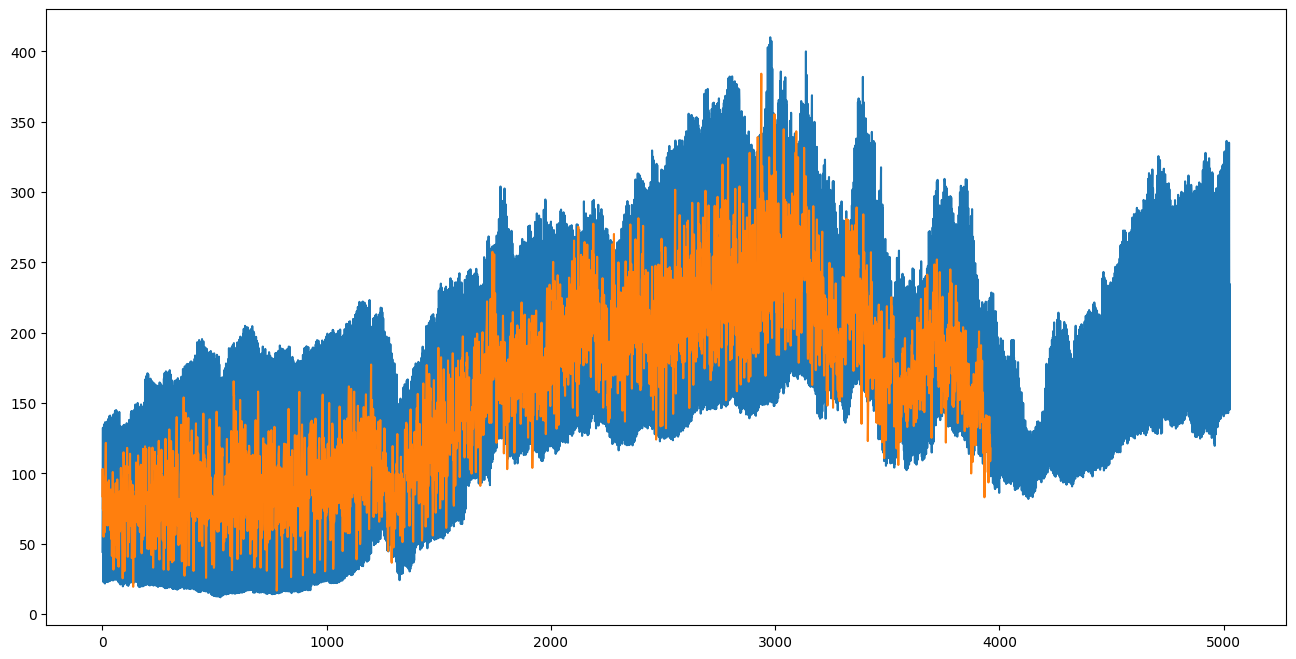

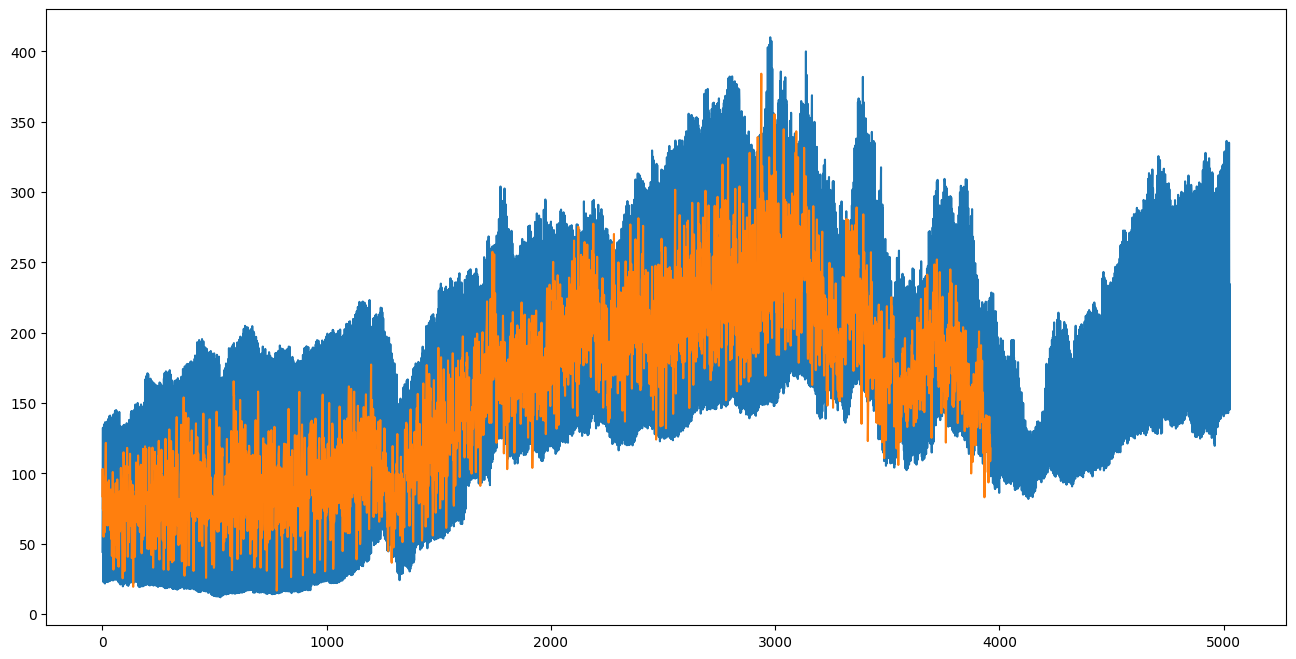

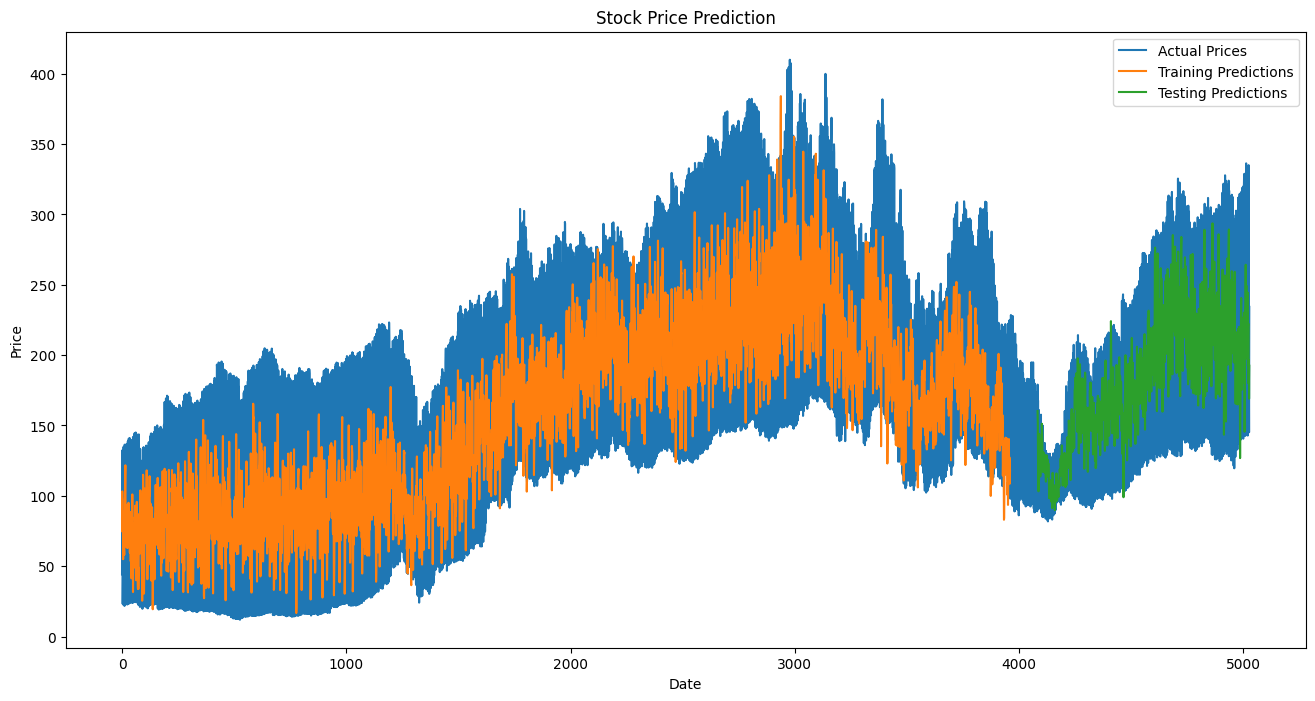

In [75]:
# Plot results
plt.figure(figsize=(16, 8))
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='Actual Prices')

# Adjust train_range to match the length of train_predict
train_range = data.index[:train_size - time_step - 1]  # Changed this line

test_range = data.index[train_size + time_step + 1:]
plt.plot(train_range, train_predict, label='Training Predictions')
# Plot results
plt.figure(figsize=(16, 8))
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='Actual Prices')

# Adjust train_range to match the length of train_predict
train_range = data.index[:train_size - time_step - 1]  # Changed this line

test_range = data.index[train_size + time_step + 1:]
plt.plot(train_range, train_predict, label='Training Predictions')
# Plot results
plt.figure(figsize=(16, 8))
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='Actual Prices')

# Adjust train_range to match the length of train_predict
train_range = data.index[:train_size - time_step - 1]  # Changed this line

test_range = data.index[train_size + time_step + 1:]
plt.plot(train_range, train_predict, label='Training Predictions')
# Plot results
plt.figure(figsize=(16, 8))
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='Actual Prices')

# Adjust train_range to match the length of train_predict
train_range = data.index[:train_size - time_step - 1]  # Changed this line

test_range = data.index[train_size + time_step + 1:]
plt.plot(train_range, train_predict, label='Training Predictions')
plt.plot(test_range, test_predict, label='Testing Predictions')
plt.legend()
plt.title(f'Stock Price Prediction') # Assuming stock_symbol is defined elsewhere
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
plt.show()
plt.show()
plt.show()

In [64]:
# Predict next day's price
last_60_days = test_data[-time_step:]
# Ensure last_60_days has the correct shape for the LSTM model
last_60_days = last_60_days.reshape(1, time_step, 1)

# Convert last_60_days to a NumPy array with a defined dtype
last_60_days = np.array(last_60_days, dtype=np.float32)

next_day_price = model.predict(last_60_days)
next_day_price = scaler.inverse_transform(next_day_price)
print(f"Predicted next day price: {next_day_price[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted next day price: 245.11
